In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [4]:


train_dir = 'C:/Users/yousi/OneDrive/Desktop/CV-TASKS-main/Dataset/train' 
test_dir = 'C:/Users/yousi/OneDrive/Desktop/CV-TASKS-main/Dataset/test'

input_shape = (128, 128, 3) 


batch_size = 16
epochs = 15

In [5]:



datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2

)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)

Found 3208 images belonging to 2 classes.
Found 708 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_generator, steps_per_epoch=train_generator.n // batch_size, epochs=epochs)


test_loss, test_accuracy = model.evaluate(test_generator)

print("Loss:", test_loss)
print("Accuracy:", test_accuracy)



c:\Users\yousi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\yousi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 34s 163ms/step - accuracy: 0.7935 - loss: 0.4373
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step - accuracy: 0.8750 - loss: 0.3827 
Epoch 3/15
  1/200 ━━━━━━━━━━━━━━━━━━━━ 24s 122ms/step - accuracy: 0.6875 - loss: 0.7022

c:\Users\yousi\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.9084 - loss: 0.2407
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 15us/step - accuracy: 1.0000 - loss: 0.0300 
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.9491 - loss: 0.1447
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9375 - loss: 0.1807   
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - accuracy: 0.9546 - loss: 0.1274
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 1.0000 - loss: 0.0315   
Epoch 9/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.9677 - loss: 0.0892
Epoch 10/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 0.9375 - loss: 0.0995 
Epoch 11/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.9749 - loss: 0.0749
Epoch 12/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9375 - loss: 0.1158   
Epoch 13/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.9861 - loss: 0.0495
Epoch 14/15
200/200 ━━━━━━━━━━━━━━━━━━━

In [17]:
model.save('keras_model.h5')

In [19]:

import keras


model = keras.models.load_model('keras_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


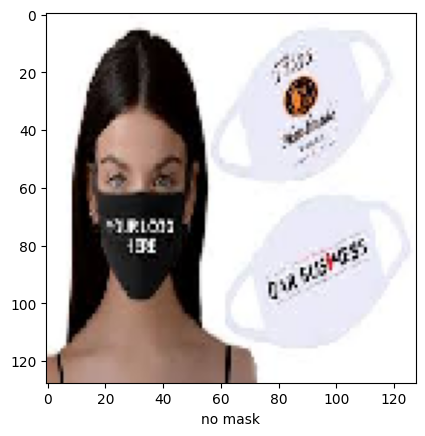

In [37]:
random_image, random_label = next(test_generator)


data_resized = tf.image.resize(random_image[0], [128, 128]) 
data_resized = tf.expand_dims(data_resized, axis=0)

predictions = model.predict(data_resized)
predicted_label = np.argmax(predictions)



prediction_name = ""

if(predicted_label==0):
    prediction_name = "with mask"
else:
    prediction_name = "no mask"
    
   

plt.imshow(random_image[0]) 
plt.xlabel(prediction_name)
plt.show()
